In [117]:
import warnings
warnings.filterwarnings("ignore")

In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

In [119]:
#Read dataset
df = pd.read_csv('./data/data.csv') 


In [120]:
df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,61954,6,02/03/2018 04:47:12,165,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,80,6,02/03/2018 01:49:05,5727100,4,4,97,231.0,97,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,3389,6,02/03/2018 04:07:56,4053796,14,8,1456,1731.0,741,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,445,6,02/03/2018 03:00:59,833502,7,5,364,582.0,103,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,53,17,02/03/2018 01:43:57,601,1,1,53,85.0,53,53,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22,6,14/02/2018 03:11:10,7,1,1,0,0.0,0,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SSH-Bruteforce
9996,22,6,14/02/2018 03:18:34,6,1,1,0,0.0,0,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SSH-Bruteforce
9997,22,6,14/02/2018 02:30:39,7,1,1,0,0.0,0,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SSH-Bruteforce
9998,22,6,14/02/2018 03:22:32,6,1,1,0,0.0,0,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SSH-Bruteforce


In [121]:
df.Label.value_counts()

Label
Benign                      4894
DoS attacks-GoldenEye        900
Brute Force -Web             611
DoS attacks-Slowloris        500
DDOS attack-HOIC             400
DoS attacks-Hulk             400
Infilteration                394
FTP-BruteForce               350
SSH-Bruteforce               350
DDOS attack-LOIC-UDP         300
DoS attacks-SlowHTTPTest     300
Bot                          284
Brute Force -XSS             230
SQL Injection                 87
Name: count, dtype: int64

In [122]:
df.dtypes

Dst Port           int64
Protocol           int64
Timestamp         object
Flow Duration      int64
Tot Fwd Pkts       int64
                  ...   
Idle Mean        float64
Idle Std         float64
Idle Max         float64
Idle Min         float64
Label             object
Length: 80, dtype: object

### Preprocessing (normalization and padding values)

In [123]:
# Z-score normalization
features = df.dtypes[df.dtypes != 'object'].index
df[features] = df[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# Fill empty values by 0
df = df.fillna(0)

In [124]:
df = df.drop(columns=['Timestamp'])

In [125]:
features

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Siz

### Data sampling
Due to the space limit of GitHub files and the large size of network traffic data, we sample a small-sized subset for model learning using **k-means cluster sampling**

In [126]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])

In [127]:
df.Label.value_counts()

Label
0     4894
6      900
2      611
9      500
4      400
7      400
11     394
10     350
13     350
5      300
8      300
1      284
3      230
12      87
Name: count, dtype: int64

In [128]:
# retain the minority class instances and sample the majority class instances
df_minor = df[(df['Label']==12)]
df_major = df.drop(df_minor.index)

In [129]:
X = df_major.drop(['Label'],axis=1) 
y = df_major.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [130]:
# use k-means to cluster the data samples and select a proportion of data from each cluster
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=100, random_state=0).fit(X)

In [131]:
klabel=kmeans.labels_
df_major['klabel']=klabel

In [132]:
df_major['klabel'].value_counts()

klabel
97    440
42    376
13    363
41    343
16    290
     ... 
61      8
69      6
14      5
10      3
59      2
Name: count, Length: 100, dtype: int64

In [133]:
cols = list(df_major)
cols.insert(80, cols.pop(cols.index('Label')))
df_major = df_major.loc[:, cols]

In [134]:
df_major

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,klabel,Label
0,3.131225,-0.461368,-0.480172,-0.171082,-0.084956,-0.173458,-0.047546,-0.723948,-0.233855,-0.702657,...,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,0,0
1,-0.427025,-0.461368,-0.322615,-0.170985,-0.033698,-0.173311,-0.045471,-0.406712,-0.233855,-0.443410,...,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,54,0
2,-0.236731,-0.461368,-0.368650,-0.170502,0.017560,-0.171258,-0.031999,1.699470,-0.233855,0.409167,...,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,13,0
3,-0.406035,-0.461368,-0.457246,-0.170840,-0.020884,-0.172908,-0.042319,-0.387090,-0.233855,-0.146745,...,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,6,0
4,-0.428578,2.052901,-0.480160,-0.171130,-0.072141,-0.173378,-0.046782,-0.550613,0.623615,-0.136055,...,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.430361,-0.461368,-0.480177,-0.171130,-0.072141,-0.173458,-0.047546,-0.723948,-0.233855,-0.702657,...,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,21,13
9996,-0.430361,-0.461368,-0.480177,-0.171130,-0.072141,-0.173458,-0.047546,-0.723948,-0.233855,-0.702657,...,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,21,13
9997,-0.430361,-0.461368,-0.480177,-0.171130,-0.072141,-0.173458,-0.047546,-0.723948,-0.233855,-0.702657,...,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,21,13
9998,-0.430361,-0.461368,-0.480177,-0.171130,-0.072141,-0.173458,-0.047546,-0.723948,-0.233855,-0.702657,...,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,21,13


In [135]:
def typicalSampling(group):
    name = group.name
    frac = 0.8
    return group.sample(frac=frac)

result = df_major.groupby(
    'klabel', group_keys=False
).apply(typicalSampling)

In [136]:
result['Label'].value_counts()

Label
0     3906
6      721
2      487
9      399
11     323
4      321
7      321
13     280
10     278
8      241
5      240
1      226
3      183
Name: count, dtype: int64

In [137]:
result

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,klabel,Label
9009,2.693474,-0.461368,-0.480173,-0.171082,-0.084956,-0.173458,-0.047546,-0.723948,-0.233855,-0.702657,...,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,0,0
2419,2.580069,-0.461368,-0.480079,-0.171082,-0.084956,-0.173458,-0.047546,-0.723948,-0.233855,-0.702657,...,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,0,0
2845,2.429283,-0.461368,-0.480176,-0.171033,-0.072141,-0.173411,-0.047546,-0.622563,-0.233855,-0.592188,...,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,0,0
8272,2.613883,-0.461368,-0.480175,-0.171082,-0.084956,-0.173458,-0.047546,-0.723948,-0.233855,-0.702657,...,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,0,0
2138,2.566094,-0.461368,-0.480175,-0.171033,-0.072141,-0.173411,-0.047546,-0.622563,-0.233855,-0.592188,...,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,-0.427025,-0.461368,-0.480156,-0.171033,-0.033698,-0.173214,-0.043163,-0.197402,-0.233855,-0.128928,...,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,99,0
4284,-0.427025,-0.461368,-0.480156,-0.171033,-0.033698,-0.173214,-0.043163,-0.197402,-0.233855,-0.128928,...,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,99,0
7205,-0.427025,-0.461368,-0.480154,-0.171033,-0.033698,-0.173214,-0.043163,-0.197402,-0.233855,-0.128928,...,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,99,0
8042,-0.427025,-0.461368,-0.480149,-0.171033,-0.033698,-0.173234,-0.045363,-0.239918,-0.233855,-0.175254,...,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,99,0


In [138]:
result = result.drop(['klabel'],axis=1)
result = pd.concat([result, df_minor], ignore_index=True)

In [139]:
result.to_csv('./data/data_km.csv',index=0)

### split train set and test set

In [140]:
# Read the sampled dataset
df=pd.read_csv('./data/data_km.csv')

In [141]:
df

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,2.693474,-0.461368,-0.480173,-0.171082,-0.084956,-0.173458,-0.047546,-0.723948,-0.233855,-0.702657,...,-0.212017,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,0
1,2.580069,-0.461368,-0.480079,-0.171082,-0.084956,-0.173458,-0.047546,-0.723948,-0.233855,-0.702657,...,-0.212017,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,0
2,2.429283,-0.461368,-0.480176,-0.171033,-0.072141,-0.173411,-0.047546,-0.622563,-0.233855,-0.592188,...,-0.212017,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,0
3,2.613883,-0.461368,-0.480175,-0.171082,-0.084956,-0.173458,-0.047546,-0.723948,-0.233855,-0.702657,...,-0.212017,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,0
4,2.566094,-0.461368,-0.480175,-0.171033,-0.072141,-0.173411,-0.047546,-0.622563,-0.233855,-0.592188,...,-0.212017,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8008,-0.427025,-0.461368,-0.340940,-0.170937,-0.020884,-0.171502,-0.034873,1.398587,-0.233855,2.066213,...,-0.212017,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,12
8009,-0.427025,-0.461368,-0.342412,-0.170985,-0.033698,-0.172689,-0.044061,0.940721,-0.233855,0.657724,...,-0.212017,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,12
8010,-0.427025,-0.461368,-0.480176,-0.171082,-0.084956,-0.173458,-0.047546,-0.723948,-0.233855,-0.702657,...,-0.212017,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,12
8011,-0.427025,-0.461368,-0.342375,-0.170937,-0.046513,-0.172521,-0.030814,1.303743,-0.233855,0.622979,...,-0.212017,-0.125459,-0.076865,-0.12884,-0.113375,-0.307966,-0.194012,-0.33129,-0.280903,12


In [142]:
X = df.drop(['Label'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [143]:
unique, counts = np.unique(y, return_counts=True)
print("Phân bố lớp:", dict(zip(unique, counts)))

Phân bố lớp: {0: 3906, 1: 226, 2: 487, 3: 183, 4: 321, 5: 240, 6: 721, 7: 321, 8: 241, 9: 399, 10: 278, 11: 323, 12: 87, 13: 280}


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [145]:
X.shape


(8013, 78)

## Feature engineering

### Feature selection by information gain

In [146]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X_train, y_train)

In [147]:
# calculate the sum of importance scores
f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])

In [148]:
# select the important features from top to bottom until the accumulated importance reaches 90%
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
Sum2 = 0
fs = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    fs.append(f_list2[i][1])
    if Sum2>=0.9:
        break        

In [149]:
X_fs = df[fs].values

In [150]:
X_fs.shape

(8013, 44)

In [151]:
y.shape

(8013,)

### Feature selection by Fast Correlation Based Filter (FCBF)

The module is imported from the GitHub repo: https://github.com/SantiagoEG/FCBF_module

In [152]:
from FCBF_module import FCBF, FCBFK, FCBFiP, get_i
fcbf = FCBFK(k = 20)
#fcbf.fit(X_fs, y)

In [153]:
X_fss = fcbf.fit_transform(X_fs,y)

In [154]:
X_fss.shape

(8013, 20)

### Re-split train & test sets after feature selection

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X_fss,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [156]:
X_train.shape

(6410, 20)

In [157]:
pd.Series(y_train).value_counts()

0     3125
6      577
2      389
9      319
11     258
7      257
4      257
13     224
10     222
8      193
5      192
1      181
3      146
12      70
Name: count, dtype: int64

### SMOTE to solve class-imbalance

In [158]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={8:200,5:200,1:200,3:200,12:200})

In [159]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [160]:
pd.Series(y_train).value_counts()

0     3125
6      577
2      389
9      319
11     258
7      257
4      257
13     224
10     222
3      200
5      200
1      200
12     200
8      200
Name: count, dtype: int64

## Machine learning model training

### Training four base learners: decision tree, random forest, extra trees, XGBoost

#### Apply XGBoost

Accuracy of XGBoost: 0.9307548346849657
Precision of XGBoost: 0.9165196020485449
Recall of XGBoost: 0.9307548346849657
F1-score of XGBoost: 0.9187547467113241
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       781
           1       1.00      1.00      1.00        45
           2       0.95      0.98      0.96        98
           3       0.97      0.89      0.93        37
           4       1.00      0.98      0.99        64
           5       1.00      1.00      1.00        48
           6       0.99      1.00      1.00       144
           7       1.00      1.00      1.00        64
           8       0.84      0.56      0.68        48
           9       1.00      0.99      0.99        80
          10       0.70      0.91      0.79        56
          11       0.37      0.11      0.17        65
          12       0.92      0.71      0.80        17
          13       1.00      1.00      1.00        56

    accuracy                 

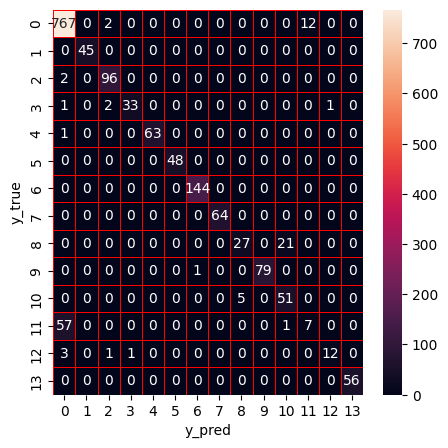

In [161]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of XGBoost using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [162]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),

    }
    clf = xgb.XGBClassifier( **params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 20/20 [01:12<00:00,  3.61s/trial, best loss: -0.9382407985028073]
XGBoost: Hyperopt estimated optimum {'learning_rate': 0.38265721496234933, 'max_depth': 14.0, 'n_estimators': 30.0}


Accuracy of XGBoost: 0.9382407985028073
Precision of XGBoost: 0.9286034912395116
Recall of XGBoost: 0.9382407985028073
F1-score of XGBoost: 0.9296593615712828
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       781
           1       1.00      1.00      1.00        45
           2       0.96      0.98      0.97        98
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        64
           5       1.00      1.00      1.00        48
           6       0.99      1.00      1.00       144
           7       1.00      1.00      1.00        64
           8       0.82      0.56      0.67        48
           9       1.00      0.99      0.99        80
          10       0.71      0.91      0.80        56
          11       0.48      0.20      0.28        65
          12       0.94      0.88      0.91        17
          13       1.00      1.00      1.00        56

    accuracy                 

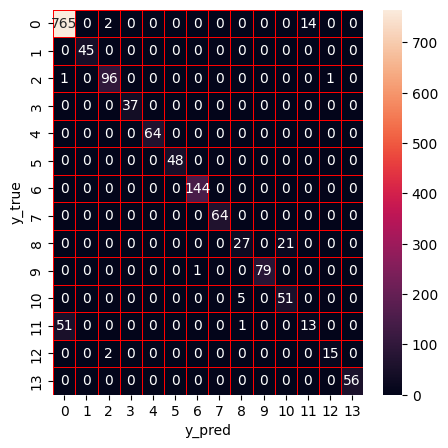

In [163]:
xg = xgb.XGBClassifier(learning_rate= 0.38265721496234933, n_estimators = 30, max_depth = 14)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [164]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

#### Apply RF

Accuracy of RF: 0.9276356830941984
Precision of RF: 0.9220313640925524
Recall of RF: 0.9276356830941984
F1-score of RF: 0.9207754686637445
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       781
           1       0.98      1.00      0.99        45
           2       0.99      0.97      0.98        98
           3       1.00      0.97      0.99        37
           4       1.00      1.00      1.00        64
           5       1.00      1.00      1.00        48
           6       0.99      1.00      1.00       144
           7       1.00      1.00      1.00        64
           8       0.61      0.94      0.74        48
           9       1.00      0.99      0.99        80
          10       0.90      0.50      0.64        56
          11       0.32      0.18      0.24        65
          12       0.85      1.00      0.92        17
          13       1.00      1.00      1.00        56

    accuracy                           0.93      

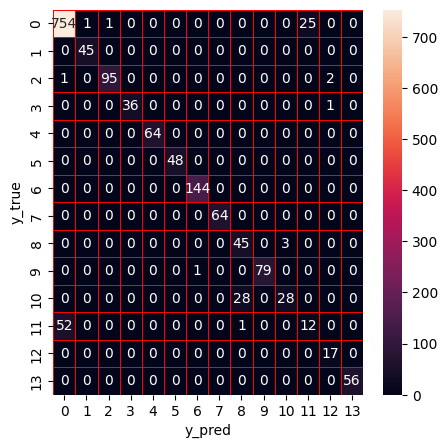

In [165]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of random forest using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [166]:
# Hyperparameter optimization of random forest
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = RandomForestClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 20/20 [03:56<00:00, 11.82s/trial, best loss: -0.9344978165938864]
Random Forest: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 26.0, 'max_features': 5.0, 'min_samples_leaf': 3.0, 'min_samples_split': 2.0, 'n_estimators': 50.0}


Accuracy of RF: 0.9288833437305053
Precision of RF: 0.9145639517272686
Recall of RF: 0.9288833437305053
F1-score of RF: 0.9169963754173678
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       781
           1       0.96      1.00      0.98        45
           2       0.96      0.97      0.96        98
           3       1.00      0.92      0.96        37
           4       1.00      1.00      1.00        64
           5       1.00      1.00      1.00        48
           6       0.99      1.00      1.00       144
           7       1.00      1.00      1.00        64
           8       0.63      0.92      0.75        48
           9       1.00      0.99      0.99        80
          10       0.86      0.54      0.66        56
          11       0.30      0.09      0.14        65
          12       0.89      0.94      0.91        17
          13       1.00      1.00      1.00        56

    accuracy                           0.93      

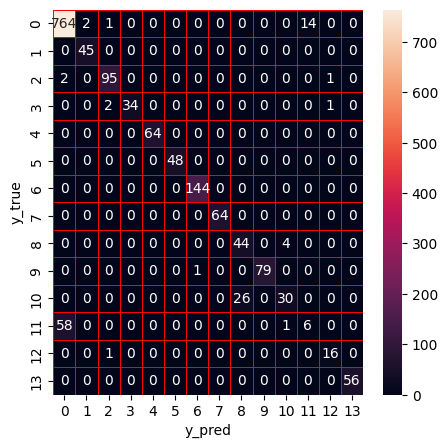

In [167]:
rf_hpo = RandomForestClassifier(n_estimators = 50, min_samples_leaf = 3, max_depth = 26, min_samples_split = 2, max_features = 5, criterion = 'gini')
rf_hpo.fit(X_train,y_train)
rf_score=rf_hpo.score(X_test,y_test)
y_predict=rf_hpo.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [168]:
rf_train=rf_hpo.predict(X_train)
rf_test=rf_hpo.predict(X_test)

#### Apply DT

Accuracy of DT: 0.9064254522769807
Precision of DT: 0.9089986595437942
Recall of DT: 0.9064254522769807
F1-score of DT: 0.9067892816262332
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       781
           1       0.94      1.00      0.97        45
           2       0.96      0.99      0.97        98
           3       0.95      0.97      0.96        37
           4       1.00      0.98      0.99        64
           5       1.00      1.00      1.00        48
           6       0.99      1.00      1.00       144
           7       1.00      1.00      1.00        64
           8       0.77      0.56      0.65        48
           9       1.00      0.99      0.99        80
          10       0.70      0.88      0.78        56
          11       0.19      0.20      0.19        65
          12       0.89      0.94      0.91        17
          13       1.00      1.00      1.00        56

    accuracy                           0.91      

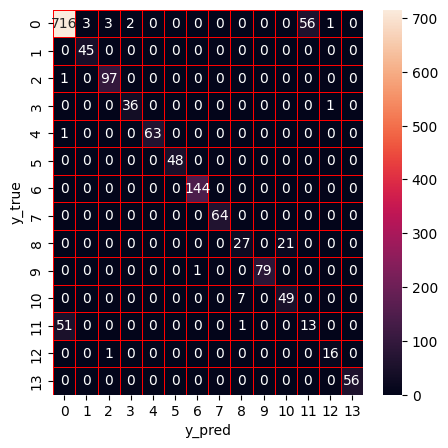

In [169]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of decision tree using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [170]:
# Hyperparameter optimization of decision tree
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = DecisionTreeClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)
print("Decision tree: Hyperopt estimated optimum {}".format(best))

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 50/50 [00:11<00:00,  4.40trial/s, best loss: -0.9276356830941984]
Decision tree: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 13.0, 'max_features': 16.0, 'min_samples_leaf': 4.0, 'min_samples_split': 9.0}


Accuracy of DT: 0.9189020586400499
Precision of DT: 0.8982821809615993
Recall of DT: 0.9189020586400499
F1-score of DT: 0.903015532891637
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       781
           1       1.00      1.00      1.00        45
           2       0.92      0.97      0.95        98
           3       0.97      0.89      0.93        37
           4       1.00      0.97      0.98        64
           5       1.00      1.00      1.00        48
           6       0.99      1.00      1.00       144
           7       0.98      0.98      0.98        64
           8       0.87      0.42      0.56        48
           9       0.99      0.99      0.99        80
          10       0.65      0.95      0.77        56
          11       0.15      0.03      0.05        65
          12       0.68      0.76      0.72        17
          13       1.00      0.98      0.99        56

    accuracy                           0.92      1

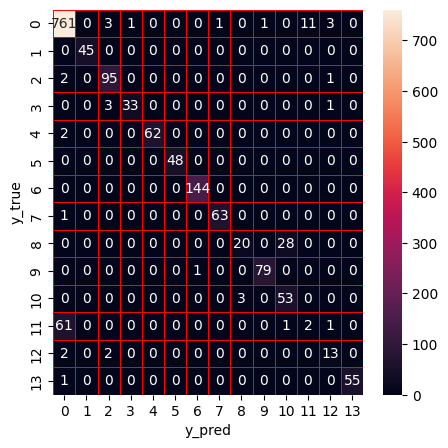

In [171]:
dt_hpo = DecisionTreeClassifier(min_samples_leaf = 4, max_depth = 13, min_samples_split = 9, max_features = 16, criterion = 'entropy')
dt_hpo.fit(X_train,y_train)
dt_score=dt_hpo.score(X_test,y_test)
y_predict=dt_hpo.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [172]:
dt_train=dt_hpo.predict(X_train)
dt_test=dt_hpo.predict(X_test)

#### Apply ET

Accuracy of ET: 0.9276356830941984
Precision of ET: 0.9194516769692926
Recall of ET: 0.9276356830941984
F1-score of ET: 0.9221210870811563
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       781
           1       1.00      1.00      1.00        45
           2       0.96      0.98      0.97        98
           3       1.00      0.95      0.97        37
           4       1.00      1.00      1.00        64
           5       1.00      1.00      1.00        48
           6       0.99      1.00      1.00       144
           7       1.00      1.00      1.00        64
           8       0.77      0.56      0.65        48
           9       1.00      0.99      0.99        80
          10       0.70      0.88      0.78        56
          11       0.31      0.20      0.24        65
          12       0.89      0.94      0.91        17
          13       1.00      1.00      1.00        56

    accuracy                           0.93      

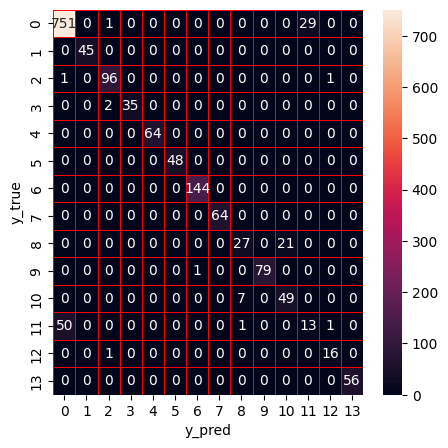

In [173]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of extra trees using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [174]:
# Hyperparameter optimization of extra trees
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = ExtraTreesClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 20/20 [00:47<00:00,  2.39s/trial, best loss: -0.932626325639426] 
Random Forest: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 35.0, 'max_features': 16.0, 'min_samples_leaf': 2.0, 'min_samples_split': 9.0, 'n_estimators': 199.0}


Accuracy of ET: 0.9313786650031192
Precision of ET: 0.9186186885569828
Recall of ET: 0.9313786650031192
F1-score of ET: 0.9212867605138245
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       781
           1       1.00      1.00      1.00        45
           2       0.93      0.95      0.94        98
           3       1.00      0.92      0.96        37
           4       1.00      1.00      1.00        64
           5       1.00      1.00      1.00        48
           6       0.99      1.00      1.00       144
           7       1.00      1.00      1.00        64
           8       0.82      0.56      0.67        48
           9       1.00      0.99      0.99        80
          10       0.71      0.91      0.80        56
          11       0.38      0.14      0.20        65
          12       0.79      0.88      0.83        17
          13       1.00      1.00      1.00        56

    accuracy                           0.93      

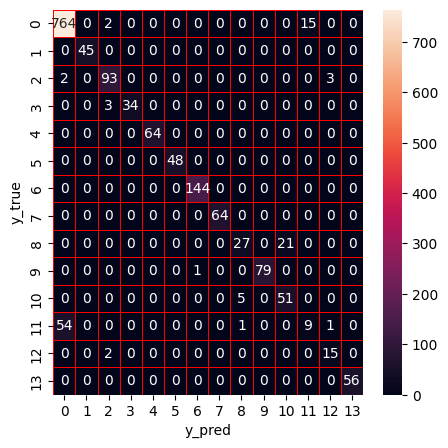

In [175]:
et_hpo = ExtraTreesClassifier(n_estimators = 199, min_samples_leaf = 2, max_depth = 35, min_samples_split = 9, max_features = 16, criterion = 'entropy')
et_hpo.fit(X_train,y_train) 
et_score=et_hpo.score(X_test,y_test)
y_predict=et_hpo.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [176]:
et_train=et_hpo.predict(X_train)
et_test=et_hpo.predict(X_test)

### Apply Stacking
The ensemble model that combines the four ML models (DT, RF, ET, XGBoost)

In [177]:
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,0,0,0,0
1,0,0,0,0
2,3,3,3,3
3,0,0,0,11
4,0,0,0,0


In [178]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [179]:
dt_train.shape

(6628, 1)

In [180]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

Accuracy of Stacking: 0.9363693075483468
Precision of Stacking: 0.9265628609767051
Recall of Stacking: 0.9363693075483468
F1-score of Stacking: 0.9285274302463387
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       781
           1       1.00      1.00      1.00        45
           2       0.97      0.98      0.97        98
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        64
           5       1.00      1.00      1.00        48
           6       0.99      1.00      1.00       144
           7       1.00      1.00      1.00        64
           8       0.82      0.56      0.67        48
           9       1.00      0.99      0.99        80
          10       0.71      0.91      0.80        56
          11       0.42      0.20      0.27        65
          12       0.94      0.88      0.91        17
          13       1.00      1.00      1.00        56

    accuracy             

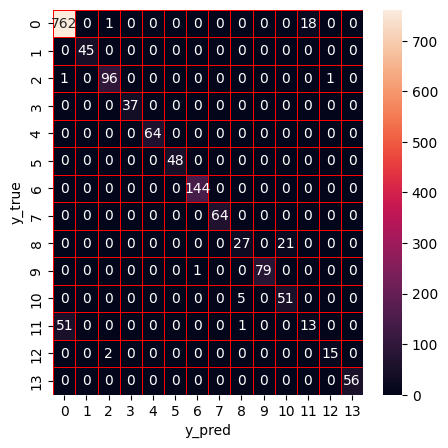

In [181]:
stk = xgb.XGBClassifier().fit(x_train, y_train)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of the stacking ensemble model (XGBoost) using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [182]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),

    }
    clf = xgb.XGBClassifier( **params)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:38<00:00,  1.90s/trial, best loss: -0.9363693075483468]
XGBoost: Hyperopt estimated optimum {'learning_rate': 0.6842020827873456, 'max_depth': 62.0, 'n_estimators': 80.0}


Accuracy of XGBoost: 0.9363693075483468
Precision of XGBoost: 0.9265628609767051
Recall of XGBoost: 0.9363693075483468
F1-score of XGBoost: 0.9285274302463387
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       781
           1       1.00      1.00      1.00        45
           2       0.97      0.98      0.97        98
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        64
           5       1.00      1.00      1.00        48
           6       0.99      1.00      1.00       144
           7       1.00      1.00      1.00        64
           8       0.82      0.56      0.67        48
           9       1.00      0.99      0.99        80
          10       0.71      0.91      0.80        56
          11       0.42      0.20      0.27        65
          12       0.94      0.88      0.91        17
          13       1.00      1.00      1.00        56

    accuracy                 

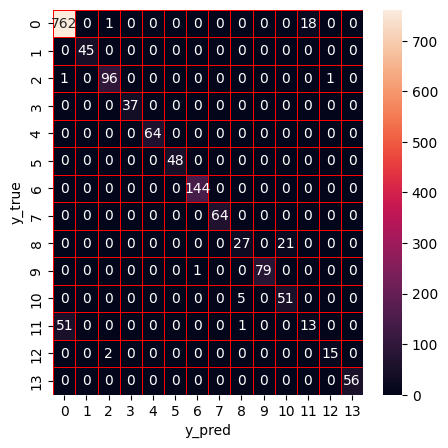

In [183]:
xg = xgb.XGBClassifier(learning_rate= 0.6842020827873456, n_estimators = 80, max_depth = 62)
xg.fit(x_train,y_train)
xg_score=xg.score(x_test,y_test)
y_predict=xg.predict(x_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Anomaly-based IDS

### Generate the BOT datasets for unknown attack detection

In [193]:
df=pd.read_csv('./data/data_km.csv')

In [194]:
df.Label.value_counts()

Label
0     3906
6      721
2      487
9      399
11     323
4      321
7      321
13     280
10     278
8      241
5      240
1      226
3      183
12      87
Name: count, dtype: int64

In [195]:
df1 = df[df['Label'] != 1]
df1['Label'][df1['Label'] > 0] = 1
df1.to_csv('./data/data_km_without_bot.csv',index=0)

In [196]:
df2 = df[df['Label'] == 1]
df2['Label'][df2['Label'] == 1] = 1
df2.to_csv('./data/data_km_bot.csv',index=0)

### Read the generated datasets for unknown attack detection

In [197]:
df1 = pd.read_csv('./data/data_km_without_bot.csv')
df2 = pd.read_csv('./data/data_km_bot.csv')

In [198]:
features = df1.drop(['Label'],axis=1).dtypes[df1.dtypes != 'object'].index
df1[features] = df1[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
df2[features] = df2[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
df1 = df1.fillna(0)
df2 = df2.fillna(0)

In [199]:
df1.Label.value_counts()

Label
0    3906
1    3881
Name: count, dtype: int64

In [200]:
df2.Label.value_counts()

Label
1    226
Name: count, dtype: int64

In [201]:
df2p=df1[df1['Label']==0]
df2pp=df2p.sample(n=None, frac=226/3906, replace=False, weights=None, random_state=None, axis=0)
df2=pd.concat([df2, df2pp])

In [202]:
df2.Label.value_counts()

Label
1    226
0    226
Name: count, dtype: int64

In [203]:
df = pd.concat([df1, df2], ignore_index=True)

In [204]:
X = df.drop(['Label'],axis=1) .values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
pd.Series(y).value_counts()

0    4132
1    4107
Name: count, dtype: int64

### Feature engineering (IG, FCBF, and KPCA)

#### Feature selection by information gain (IG)

In [205]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X, y)

In [206]:
# calculate the sum of importance scores
f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])

In [207]:
# select the important features from top to bottom until the accumulated importance reaches 90%
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
Sum2 = 0
fs = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    fs.append(f_list2[i][1])
    if Sum2>=0.9:
        break        

In [208]:
X_fs = df[fs].values

In [209]:
X_fs.shape

(8239, 46)

In [210]:
X_fs

array([[ 2.65864042, -0.66979874, -0.17425846, ..., -0.17364606,
        -0.17351811, -0.33549031],
       [ 2.54677716, -0.67726588, -0.17425846, ..., -0.17364606,
        -0.17351811, -0.33549031],
       [ 2.39804214, -0.62788091, -0.1741389 , ..., -0.17359824,
        -0.1734703 , -0.33549031],
       ...,
       [-0.39882292, -0.67002501, -0.17103027, ..., -0.17235494,
        -0.17332684,  0.16664237],
       [ 2.88951438, -0.66951589, -0.17418672, ..., -0.17364606,
        -0.17351811, -0.33549031],
       [-0.42094598, -0.68428047, -0.17444976, ..., -0.17369388,
        -0.17351811, -0.33549031]])

#### Feature selection by Fast Correlation Based Filter (FCBF)

The module is imported from the GitHub repo: https://github.com/SantiagoEG/FCBF_module

In [211]:
from FCBF_module import FCBF, FCBFK, FCBFiP, get_i
fcbf = FCBFK(k = 20)
#fcbf.fit(X_fs, y)

In [212]:
X_fss = fcbf.fit_transform(X_fs,y)

In [213]:
X_fss.shape

(8239, 20)

In [214]:
X_fss

array([[ 2.65864042, -0.66979874, -0.74034837, ..., -0.62059946,
        -0.44524416, -0.70575055],
       [ 2.54677716, -0.67726588, -0.74034837, ..., -0.62059946,
        -0.44524416, -0.70575055],
       [ 2.39804214, -0.62788091, -0.68103213, ..., -0.62059946,
        -0.44338917, -0.62675152],
       ...,
       [-0.39882292, -0.67002501,  2.05325523, ...,  2.48403317,
         4.32282362,  3.29942483],
       [ 2.88951438, -0.66951589, -0.74034837, ..., -0.62059946,
        -0.44524416, -0.70575055],
       [-0.42094598, -0.68428047, -0.43994032, ..., -0.62059946,
        -0.39891754, -0.310961  ]])

####  kernel principal component analysis (KPCA)

In [215]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 10, kernel = 'rbf')
kpca.fit(X_fss, y)
X_kpca = kpca.transform(X_fss)

# from sklearn.decomposition import PCA
# kpca = PCA(n_components = 10)
# kpca.fit(X_fss, y)
# X_kpca = kpca.transform(X_fss)

### Train-test split after feature selection

In [216]:
X_train = X_kpca[:len(df1)]
y_train = y[:len(df1)]
X_test = X_kpca[len(df1):]
y_test = y[len(df1):]

### Solve class-imbalance by SMOTE

In [217]:
pd.Series(y_train).value_counts()

0    3906
1    3881
Name: count, dtype: int64

In [226]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={1:3906})
X_train, y_train = smote.fit_resample(X_train, y_train)

In [227]:
pd.Series(y_train).value_counts()

0    3906
1    3906
Name: count, dtype: int64

In [228]:
pd.Series(y_test).value_counts()

1    226
0    226
Name: count, dtype: int64

### Apply the cluster labeling (CL) k-means method

In [229]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN,MeanShift
from sklearn.cluster import SpectralClustering,AgglomerativeClustering,AffinityPropagation,Birch,MiniBatchKMeans,MeanShift 
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.metrics import classification_report
from sklearn import metrics

In [230]:
def CL_kmeans(X_train, X_test, y_train, y_test,n,b=100):
    km_cluster = MiniBatchKMeans(n_clusters=n,batch_size=b)
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    print(classification_report(y_test, result2))
    cm=confusion_matrix(y_test,result2)
    acc=metrics.accuracy_score(y_test,result2)
    print(str(acc))
    print(cm)

In [231]:
CL_kmeans(X_train, X_test, y_train, y_test, 8)

              precision    recall  f1-score   support

           0       1.00      0.73      0.84       226
           1       0.79      1.00      0.88       226

    accuracy                           0.87       452
   macro avg       0.89      0.87      0.86       452
weighted avg       0.89      0.87      0.86       452

0.8650442477876106
[[165  61]
 [  0 226]]


### Hyperparameter optimization of CL-k-means
Tune "k"

In [232]:
#Hyperparameter optimization by BO-GP
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn import metrics

space  = [Integer(2, 50, name='n_clusters')]
@use_named_args(space)
def objective(**params):
    km_cluster = MiniBatchKMeans(batch_size=100, **params)
    n=params['n_clusters']
    
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    cm=metrics.accuracy_score(y_test,result2)
    print(str(n)+" "+str(cm))
    return (1-cm)
from skopt import gp_minimize
import time
t1=time.time()
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)
t2=time.time()
print(t2-t1)
print("Best score=%.4f" % (1-res_gp.fun))
print("""Best parameters: n_clusters=%d""" % (res_gp.x[0]))

30 0.4446902654867257
43 0.7212389380530974
43 0.9845132743362832
43 0.7146017699115044
32 0.7190265486725663
20 0.7146017699115044
16 0.7013274336283186
5 0.672566371681416
15 0.9004424778761062
25 0.9358407079646017
2 0.5663716814159292
42 0.46238938053097345
50 0.9734513274336283
18 0.7079646017699115
8 0.6460176991150443
28 0.7212389380530974
43 0.6858407079646017
38 0.6814159292035398
17 0.7035398230088495
11 0.8584070796460177
16.131787538528442
Best score=0.9845
Best parameters: n_clusters=43


In [233]:
#Hyperparameter optimization by BO-TPE
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics

def objective(params):
    params = {
        'n_clusters': int(params['n_clusters']), 
    }
    km_cluster = MiniBatchKMeans(batch_size=100, **params)
    n=params['n_clusters']
    
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    score=metrics.accuracy_score(y_test,result2)
    print(str(params['n_clusters'])+" "+str(score))
    return {'loss':1-score, 'status': STATUS_OK }
space = {
    'n_clusters': hp.quniform('n_clusters', 2, 50, 1),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

32 0.7013274336283186                                 
22 0.7168141592920354                                                           
28 0.7256637168141593                                                           
4 0.6017699115044248                                                            
18 0.9004424778761062                                                           
17 0.6858407079646017                                                           
24 0.6769911504424779                                                           
18 0.7212389380530974                                                           
16 0.6946902654867256                                                           
31 0.5                                                                          
26 0.7123893805309734                                                            
28 0.9314159292035398                                                            
12 0.8075221238938053                               

In [234]:
# Từ BO-GP
print("Kết quả với BO-GP n_clusters=43")
CL_kmeans(X_train, X_test, y_train, y_test, n=43)

Kết quả với BO-GP n_clusters=43
              precision    recall  f1-score   support

           0       0.65      0.99      0.79       226
           1       0.98      0.47      0.63       226

    accuracy                           0.73       452
   macro avg       0.82      0.73      0.71       452
weighted avg       0.82      0.73      0.71       452

0.7300884955752213
[[224   2]
 [120 106]]


In [235]:
# Từ BO-TPE
print("Kết quả với BO-TPE n_clusters=28")
CL_kmeans(X_train, X_test, y_train, y_test, n=28)

Kết quả với BO-TPE n_clusters=28


              precision    recall  f1-score   support

           0       0.65      0.98      0.78       226
           1       0.95      0.46      0.62       226

    accuracy                           0.72       452
   macro avg       0.80      0.72      0.70       452
weighted avg       0.80      0.72      0.70       452

0.7212389380530974
[[221   5]
 [121 105]]


### Apply the CL-k-means model with biased classifiers

In [102]:
# Only a sample code to show the logic. It needs to work on the entire dataset to generate sufficient training samples for biased classifiers
def Anomaly_IDS(X_train, X_test, y_train, y_test,n,b=100):
    # CL-kmeans
    km_cluster = MiniBatchKMeans(n_clusters=n,batch_size=b)
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    print(classification_report(y_test, result2))
    cm=confusion_matrix(y_test,result2)
    acc=metrics.accuracy_score(y2,result2)
    print(str(acc))
    print(cm)
    
    #Biased classifier construction
    count=0
    print(len(y))
    a=np.zeros(n)
    b=np.zeros(n)
    FNL=[]
    FPL=[]
    for v in range(0,n):
        al=[]
        bl=[]
        for i in range(0,len(y)):   
            if result[i]==v:        
                if y[i]==1:        #label 1
                    a[v]=a[v]+1
                    al.append(i)
                else:             #label 0
                    b[v]=b[v]+1
                    bl.append(i)
        if a[v]<=b[v]:
            FNL.extend(al)
        else:
            FPL.extend(bl)
        #print(str(v)+"="+str(a[v]/(a[v]+b[v])))
        
    dffp=df.iloc[FPL, :]
    dffn=df.iloc[FNL, :]
    dfva0=df[df['Label']==0]
    dfva1=df[df['Label']==1]
    
    dffpp=dfva1.sample(n=None, frac=len(FPL)/dfva1.shape[0], replace=False, weights=None, random_state=None, axis=0)
    dffnp=dfva0.sample(n=None, frac=len(FNL)/dfva0.shape[0], replace=False, weights=None, random_state=None, axis=0)
    
    dffp_f=pd.concat([dffp, dffpp])
    dffn_f=pd.concat([dffn, dffnp])
    
    Xp = dffp_f.drop(['Label'],axis=1)  
    yp = dffp_f.iloc[:, -1].values.reshape(-1,1)
    yp=np.ravel(yp)

    Xn = dffn_f.drop(['Label'],axis=1)  
    yn = dffn_f.iloc[:, -1].values.reshape(-1,1)
    yn=np.ravel(yn)
    
    rfp = RandomForestClassifier(random_state = 0)
    rfp.fit(Xp,yp)
    rfn = RandomForestClassifier(random_state = 0)
    rfn.fit(Xn,yn)

    dffnn_f=pd.concat([dffn, dffnp])
    
    Xnn = dffn_f.drop(['Label'],axis=1)  
    ynn = dffn_f.iloc[:, -1].values.reshape(-1,1)
    ynn=np.ravel(ynn)

    rfnn = RandomForestClassifier(random_state = 0)
    rfnn.fit(Xnn,ynn)

    X2p = df2.drop(['Label'],axis=1) 
    y2p = df2.iloc[:, -1].values.reshape(-1,1)
    y2p=np.ravel(y2p)

    result2 = km_cluster.predict(X2p)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y)):
            if result[i]==v:
                if y[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    l1=[]
    l0=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y2p)):
        if result2[v] in list1:
            result2[v]=0
            l0.append(v)
        elif result2[v] in list2:
            result2[v]=1
            l1.append(v)
        else:
            print("-1")
    print(classification_report(y2p, result2))
    cm=confusion_matrix(y2p,result2)
    print(cm)